# Stock Market Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [5]:
stock_market = pd.read_csv('C:/Google_Adv_DA_Project/Stock_Market_analysis.csv')
stock_market

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07-17-2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07-14-2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07-13-2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
25155,NFLX,07-24-2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07-23-2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07-22-2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07-19-2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971


In [6]:
stock_market.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07-17-2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07-14-2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07-13-2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [7]:
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [8]:
stock_market.describe()

,Volume
count,2.516000e+04
mean,5.131764e+07
std,6.399143e+07
min,1.143952e+06
25%,1.200394e+07
50%,2.672083e+07
75%,6.857269e+07
max,1.065209e+09


In [9]:
stock_market.columns

Index(['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [10]:
stock_market.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [11]:
stock_market.dtypes

Company       object
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [12]:
# Create a DataFrame
stocks_dataframe = pd.DataFrame(stock_market)

# Convert the 'Date' column to datetime with flexible parsing
stocks_dataframe['Date'] = pd.to_datetime(stock_market['Date'], format='%m-%d-%Y', errors='coerce')
stocks_dataframe['Date'].fillna(pd.to_datetime(stock_market['Date'], format='%m/%d/%Y', errors='coerce'), inplace=True)

# Extract the date without the time component
date_time_interval = stocks_dataframe['Date'].dt.normalize()

In [13]:
date_time_interval

0       2023-07-17
1       2023-07-14
2       2023-07-13
3       2023-07-12
4       2023-07-11
           ...    
25155   2013-07-24
25156   2013-07-23
25157   2013-07-22
25158   2013-07-19
25159   2013-07-18
Name: Date, Length: 25160, dtype: datetime64[ns]

In [14]:
stock_market.Date = date_time_interval

In [15]:
stock_market

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,2023-07-17,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,2023-07-14,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,2023-07-13,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,2023-07-12,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,2023-07-11,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
25155,NFLX,2013-07-24,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,2013-07-23,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,2013-07-22,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,2013-07-19,$37.7966,18098750,$38.2043,$38.2784,$37.5971


In [16]:
stock_market.dtypes

Company               object
Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

In [17]:
stock_market['Close/Last'] = stock_market['Close/Last'].map(lambda x:float(x.replace('$','')))
stock_market['Open'] = stock_market['Open'].map(lambda x:float(x.replace('$','')))
stock_market['High'] = stock_market['High'].map(lambda x:float(x.replace('$','')))
stock_market['Low'] = stock_market['Low'].map(lambda x:float(x.replace('$','')))

In [18]:
stock_market.dtypes

Company               object
Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

# Apple Company Data Analysis

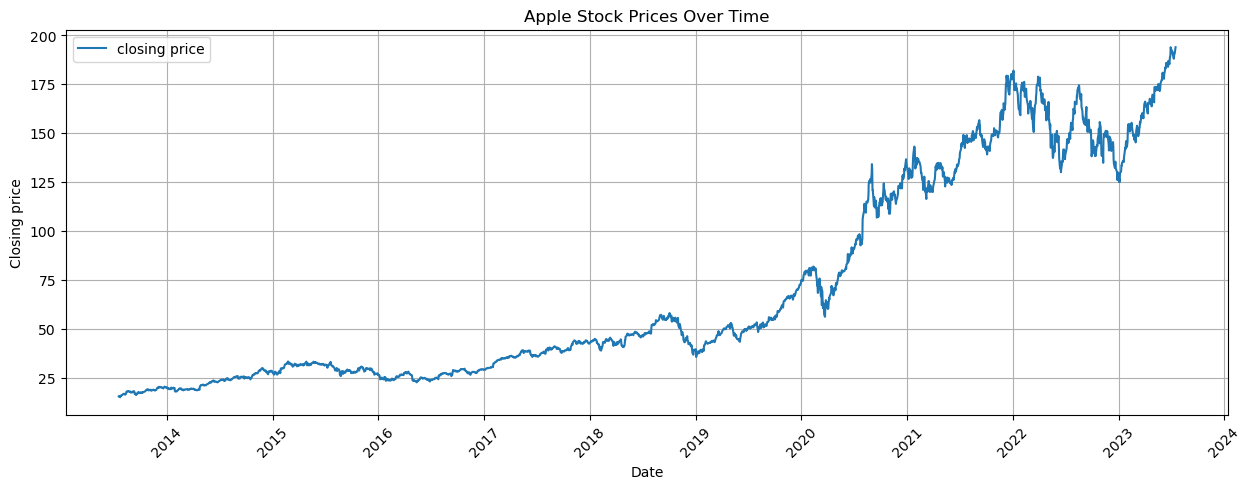

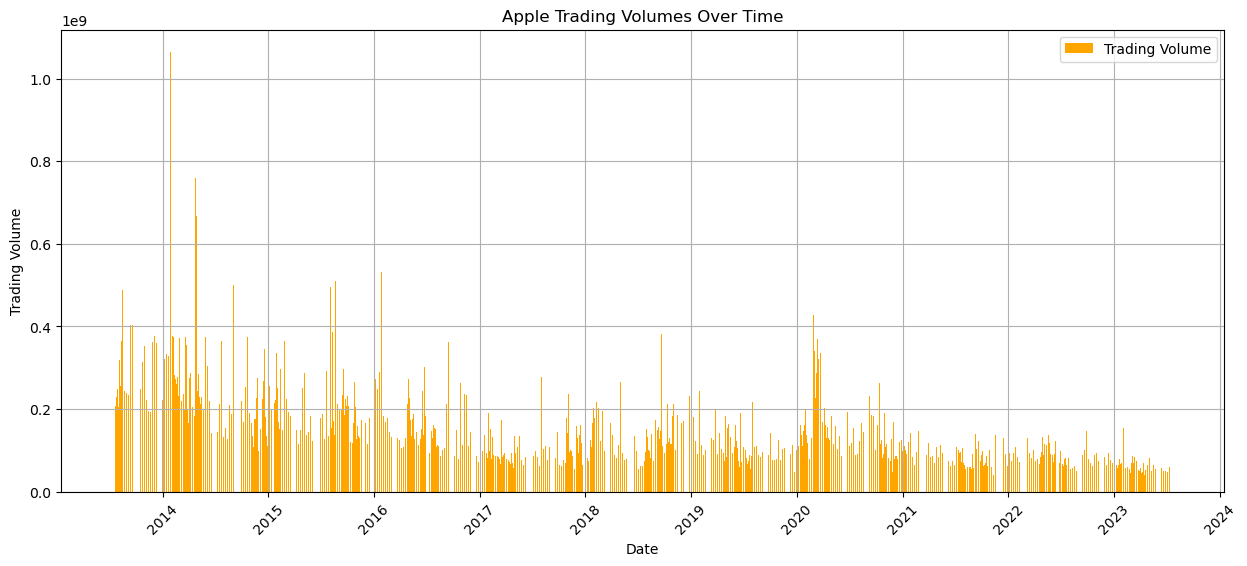

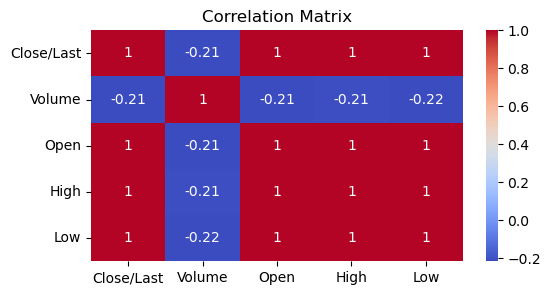

In [19]:
apple_data = stock_market[stock_market['Company'] == 'AAPL']

#line chart for stock prices over time
plt.figure(figsize=(15,5))
plt.plot(apple_data['Date'],apple_data['Close/Last'],label = 'closing price')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('Apple Stock Prices Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

#Bar plot for trading volumes over time
plt.figure(figsize = (15,6))
plt.bar(apple_data['Date'], apple_data['Volume'],label='Trading Volume', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Apple Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

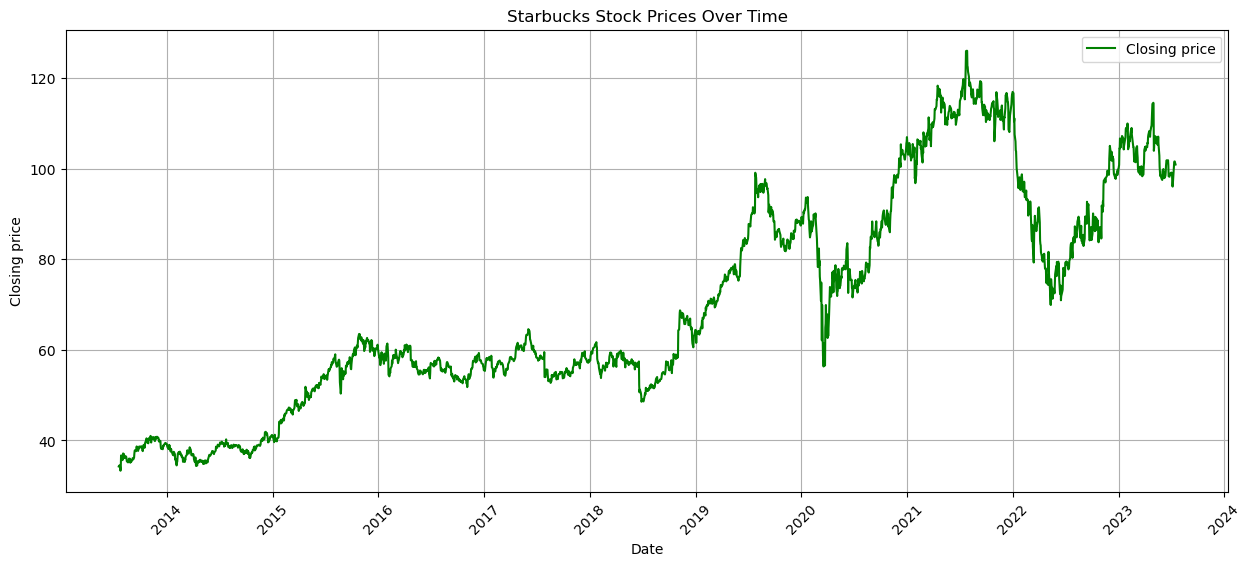

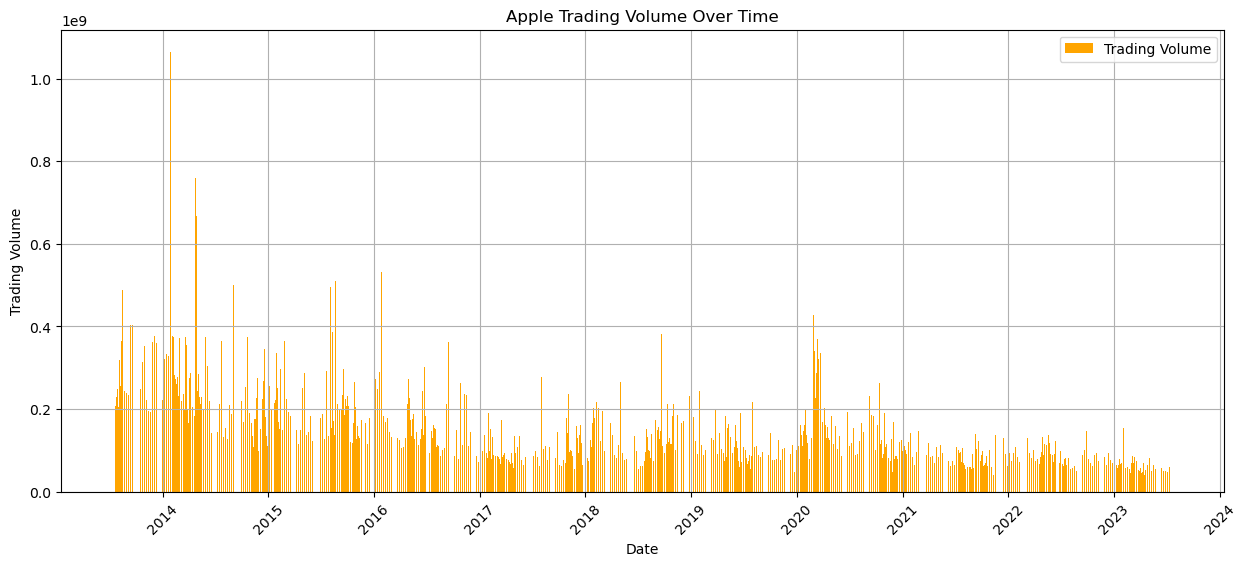

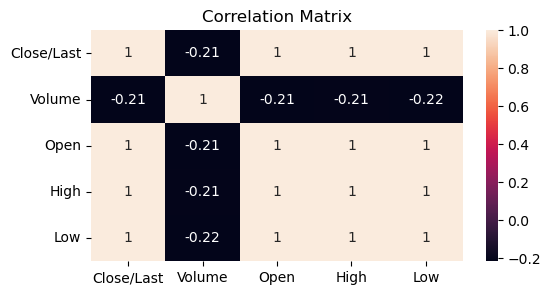

In [20]:
# Starbucks data
starbucks_data = stock_market[stock_market['Company'] == 'SBUX']

#Line chart for stock prices over time
plt.figure(figsize=(15,6))
plt.plot(starbucks_data['Date'],starbucks_data['Close/Last'],color='green',label='Closing price')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('Starbucks Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes
plt.figure(figsize=(15,6))
plt.bar(apple_data['Date'], apple_data['Volume'], label='Trading Volume', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Apple Trading Volume Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heat map to visualize the correlations between numeric data
correlation_matrix = stock_market.corr(numeric_only = True)
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.show()

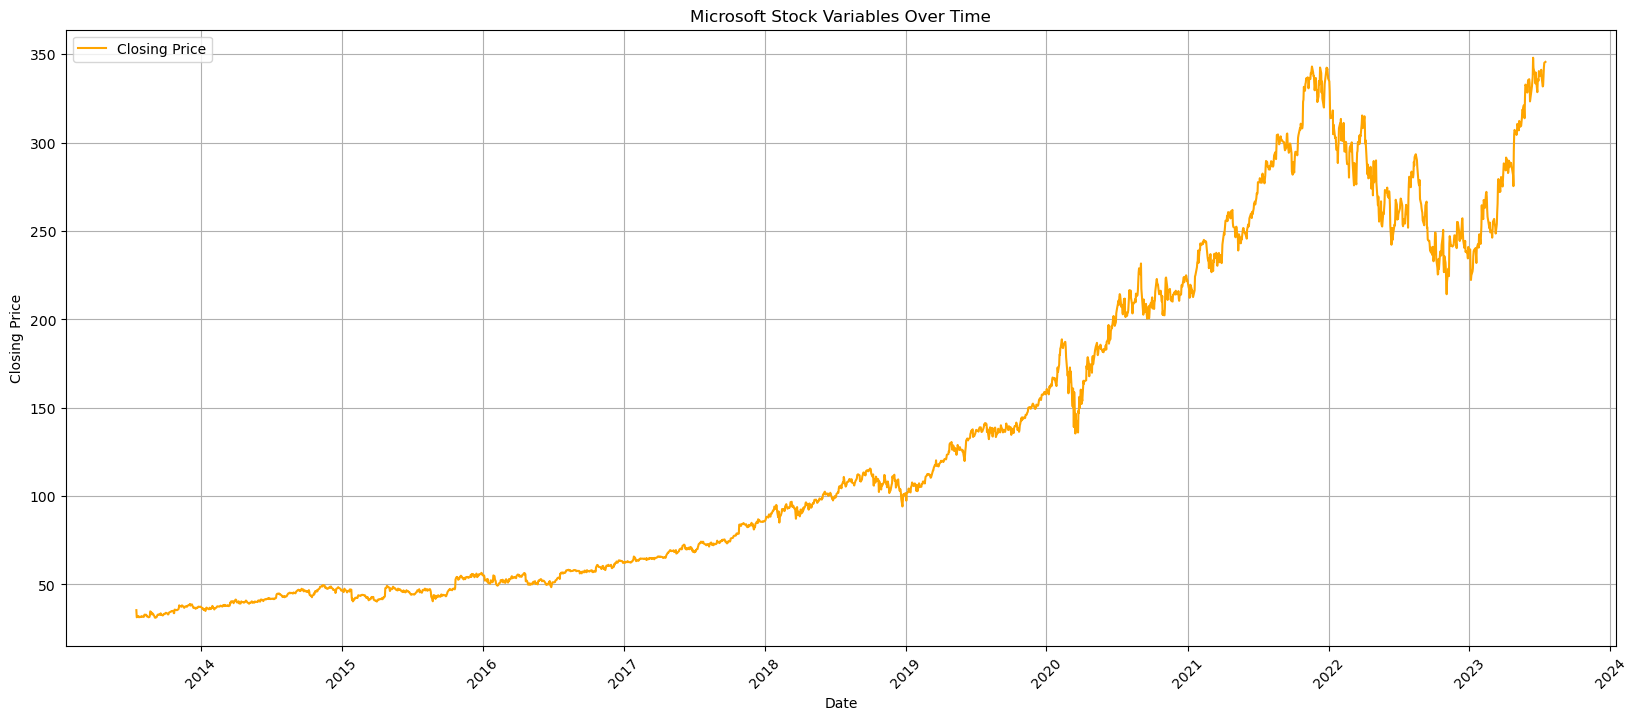

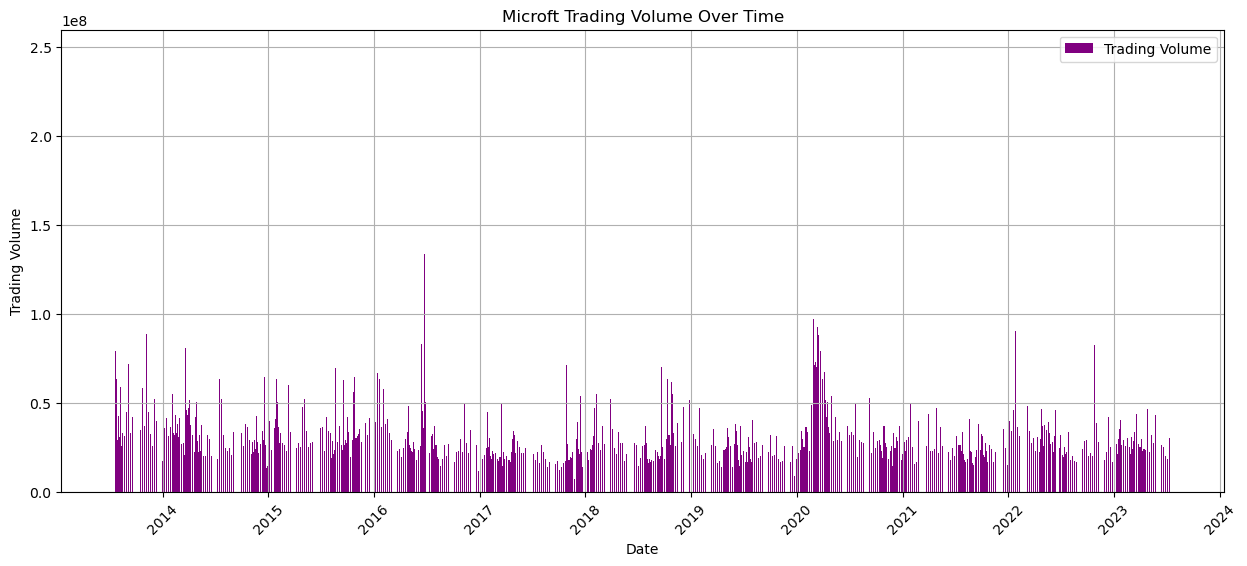

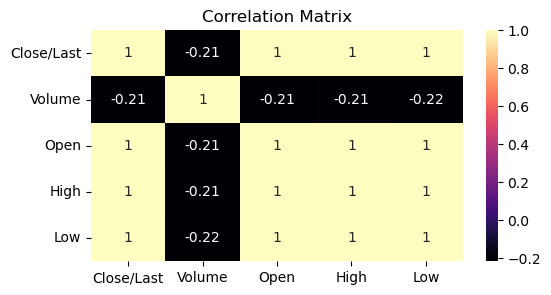

In [21]:
# finding the insights from the microsoft data
microsoft_data = stock_market[stock_market['Company'] == 'MSFT']
 
# Line chart for stock variables over time
plt.figure(figsize=(20,8))
plt.plot(microsoft_data['Date'], microsoft_data['Close/Last'], color = 'orange', label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Microsoft Stock Variables Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trdaing volumes over time
plt.figure(figsize=(15,6))
plt.bar(microsoft_data['Date'], microsoft_data['Volume'], color = 'purple', label = 'Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Microft Trading Volume Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# Heatmap for correlation between two numeric data
correlation_matrix = stock_market.corr(numeric_only = True)
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot = True, cmap = 'magma')
plt.title('Correlation Matrix')
plt.show()

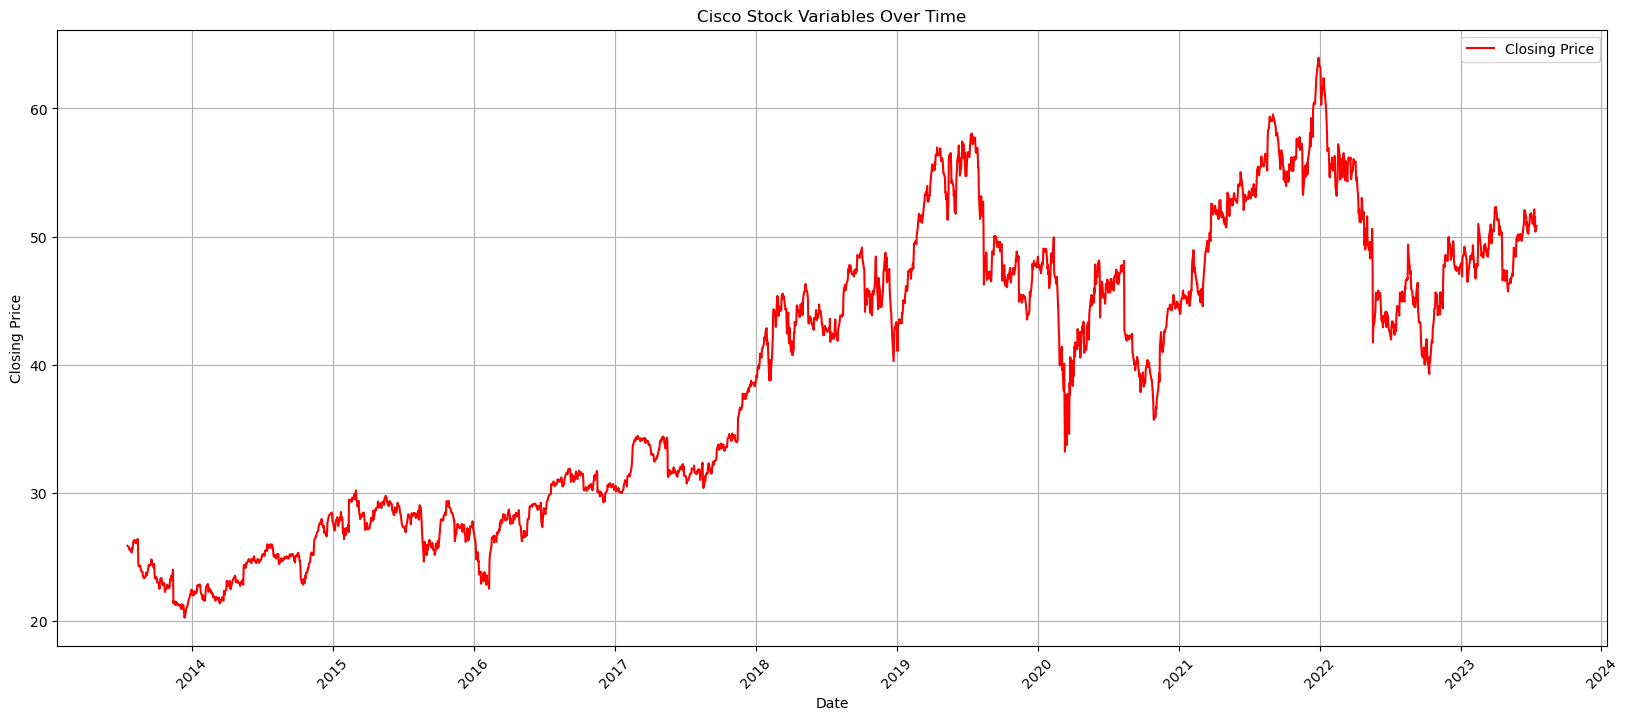

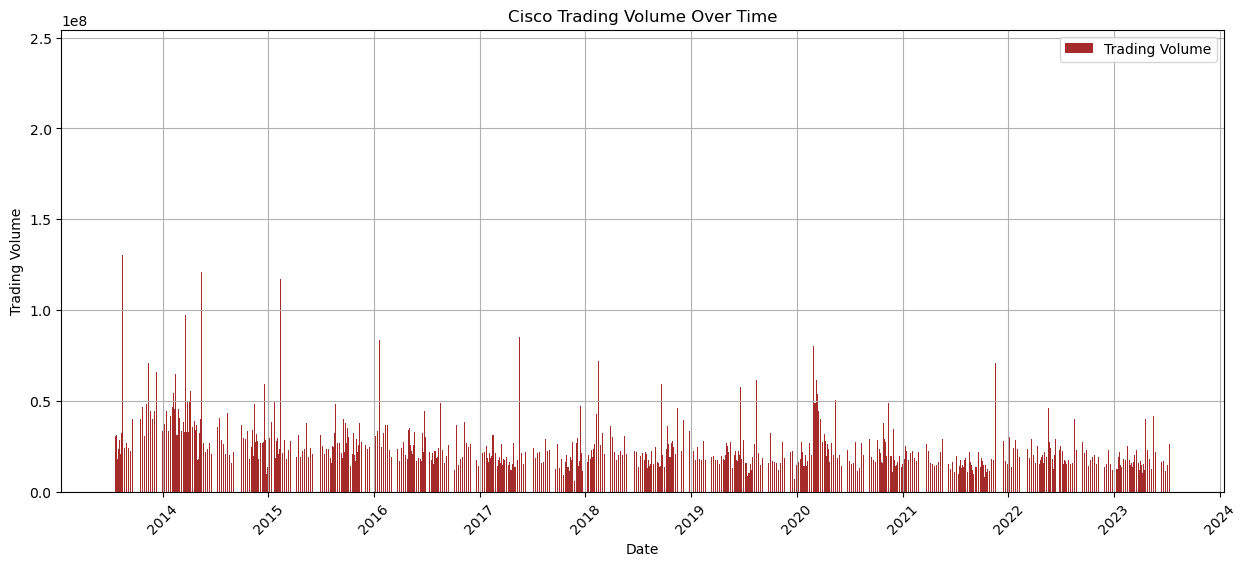

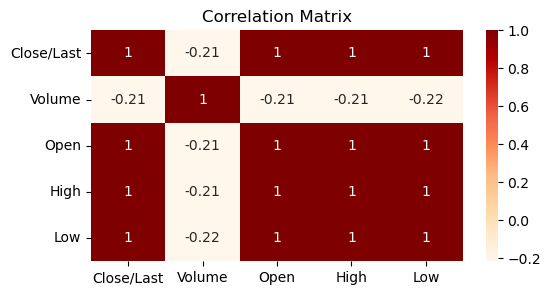

In [22]:
# finding the analysis in cisco company data
cisco_data = stock_market[stock_market['Company'] == 'CSCO']

# Line chart for stock variables over time
plt.figure(figsize=(20,8))
plt.plot(cisco_data['Date'], cisco_data['Close/Last'], color = 'Red', label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Cisco Stock Variables Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trdaing volumes over time
plt.figure(figsize=(15,6))
plt.bar(cisco_data['Date'], cisco_data['Volume'], color = 'brown', label = 'Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Cisco Trading Volume Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# Heatmap for correlation between two numeric data
correlation_matrix = stock_market.corr(numeric_only = True)
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot = True, cmap = 'OrRd')
plt.title('Correlation Matrix')
plt.show()

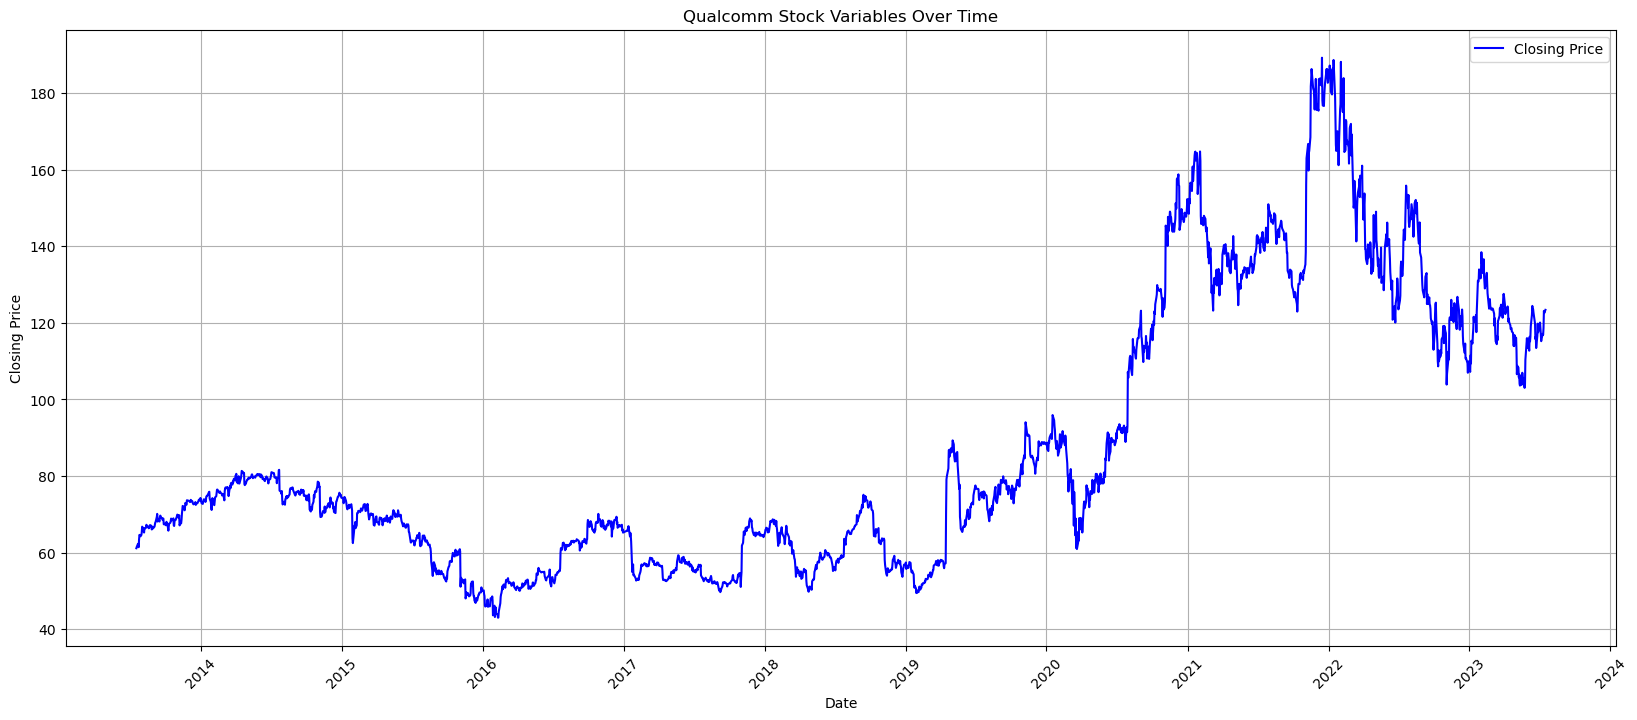

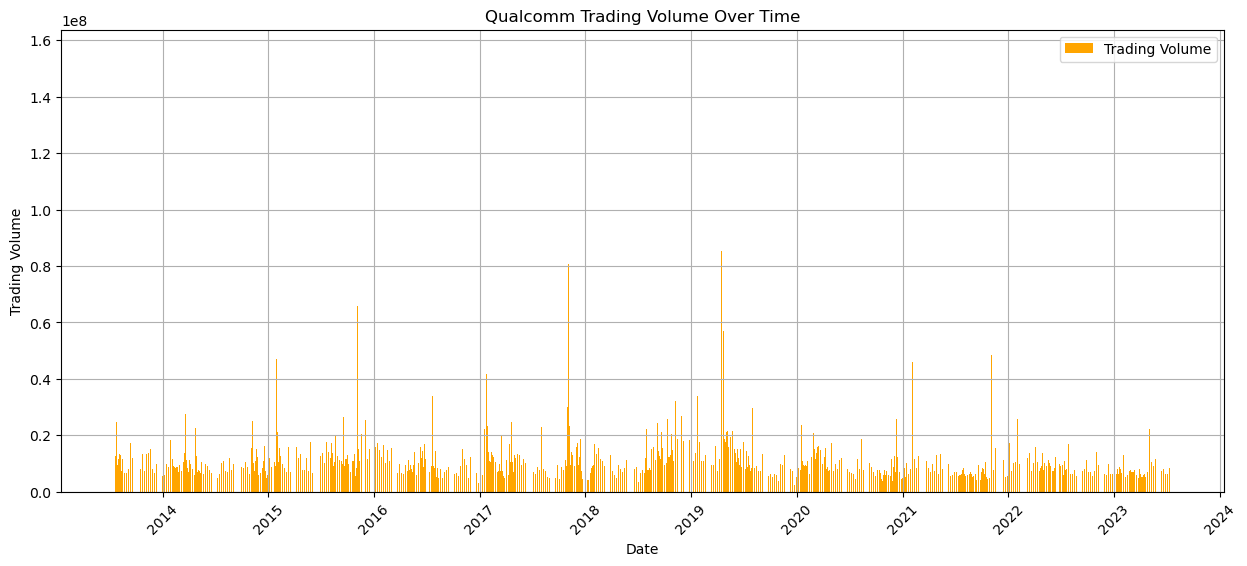

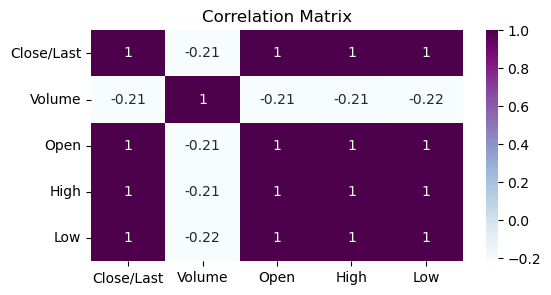

In [23]:
# finding the analysis in Qualcomm company data
qualcomm_data = stock_market[stock_market['Company'] == 'QCOM']

# Line chart for stock variables over time
plt.figure(figsize=(20,8))
plt.plot(qualcomm_data['Date'], qualcomm_data['Close/Last'], color = 'Blue', label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Qualcomm Stock Variables Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trdaing volumes over time
plt.figure(figsize=(15,6))
plt.bar(qualcomm_data['Date'], qualcomm_data['Volume'], color = 'orange', label = 'Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Qualcomm Trading Volume Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# Heatmap for correlation between two numeric data
correlation_matrix = stock_market.corr(numeric_only = True)
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot = True, cmap = 'BuPu')
plt.title('Correlation Matrix')
plt.show()

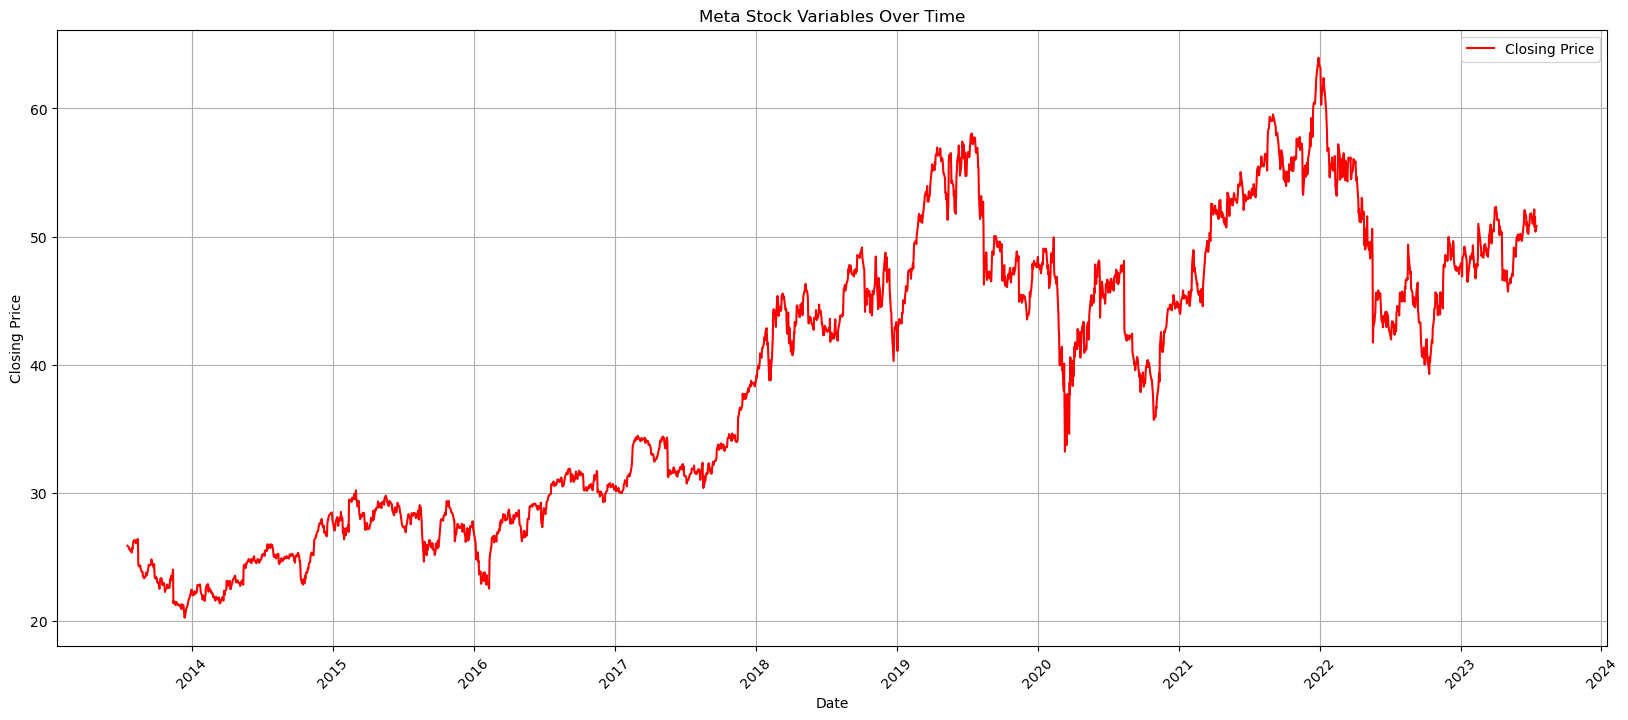

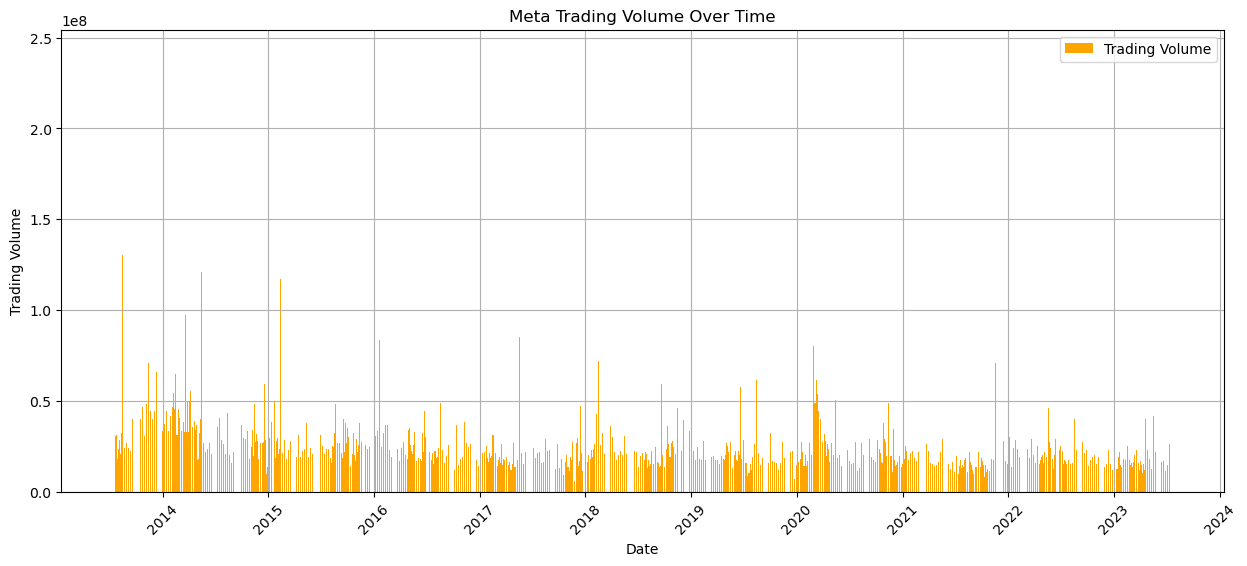

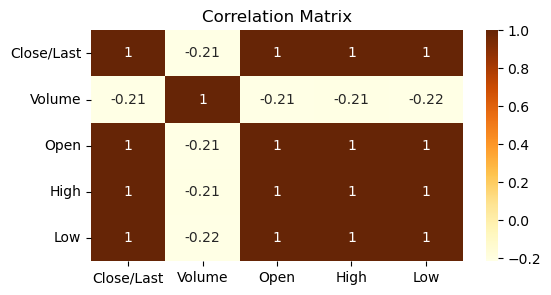

In [24]:
# finding the analysis in meta company data
meta_data = stock_market[stock_market['Company'] == 'CSCO']

# Line chart for stock variables over time
plt.figure(figsize=(20,8))
plt.plot(meta_data['Date'], meta_data['Close/Last'], color = 'red', label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Meta Stock Variables Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trdaing volumes over time
plt.figure(figsize=(15,6))
plt.bar(meta_data['Date'], meta_data['Volume'], color = 'orange', label = 'Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Meta Trading Volume Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# Heatmap for correlation between two numeric data
correlation_matrix = stock_market.corr(numeric_only = True)
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot = True, cmap = 'YlOrBr')
plt.title('Correlation Matrix')
plt.show()

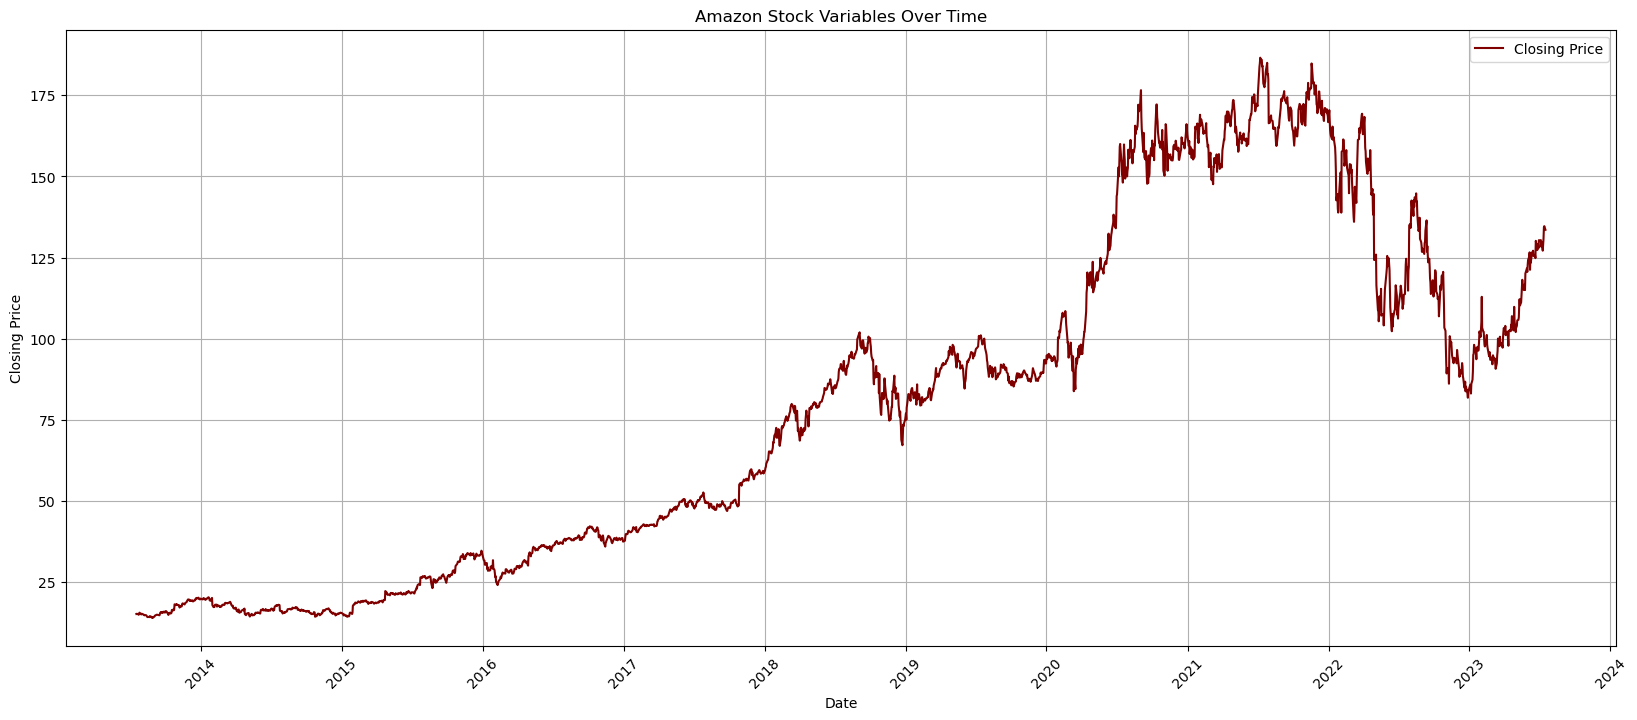

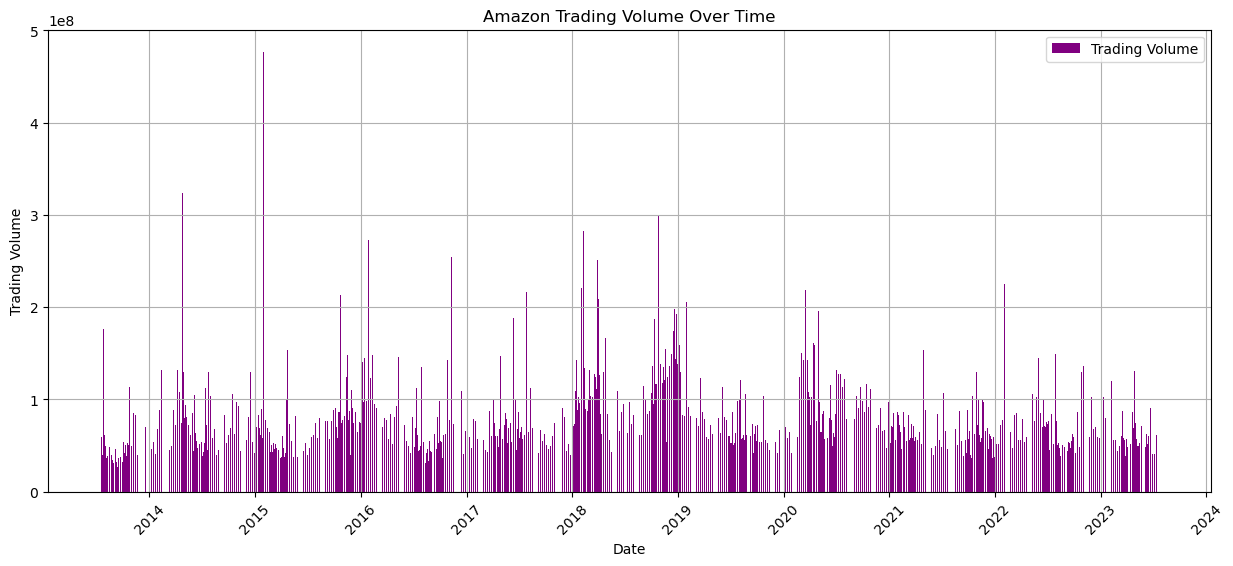

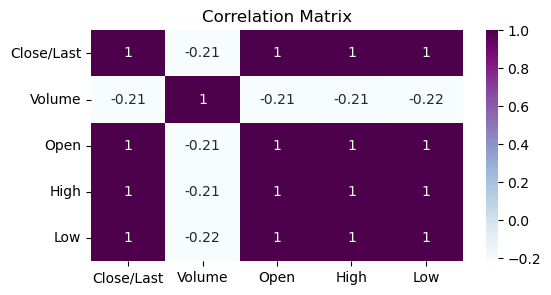

In [25]:
# finding the analysis in amazon company data
amazon_data = stock_market[stock_market['Company'] == 'AMZN']

# Line chart for stock variables over time
plt.figure(figsize=(20,8))
plt.plot(amazon_data['Date'], amazon_data['Close/Last'], color = 'maroon', label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Amazon Stock Variables Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trdaing volumes over time
plt.figure(figsize=(15,6))
plt.bar(amazon_data['Date'], amazon_data['Volume'], color = 'purple', label = 'Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Amazon Trading Volume Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# Heatmap for correlation between two numeric data
correlation_matrix = stock_market.corr(numeric_only = True)
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot = True, cmap = 'BuPu')
plt.title('Correlation Matrix')
plt.show()

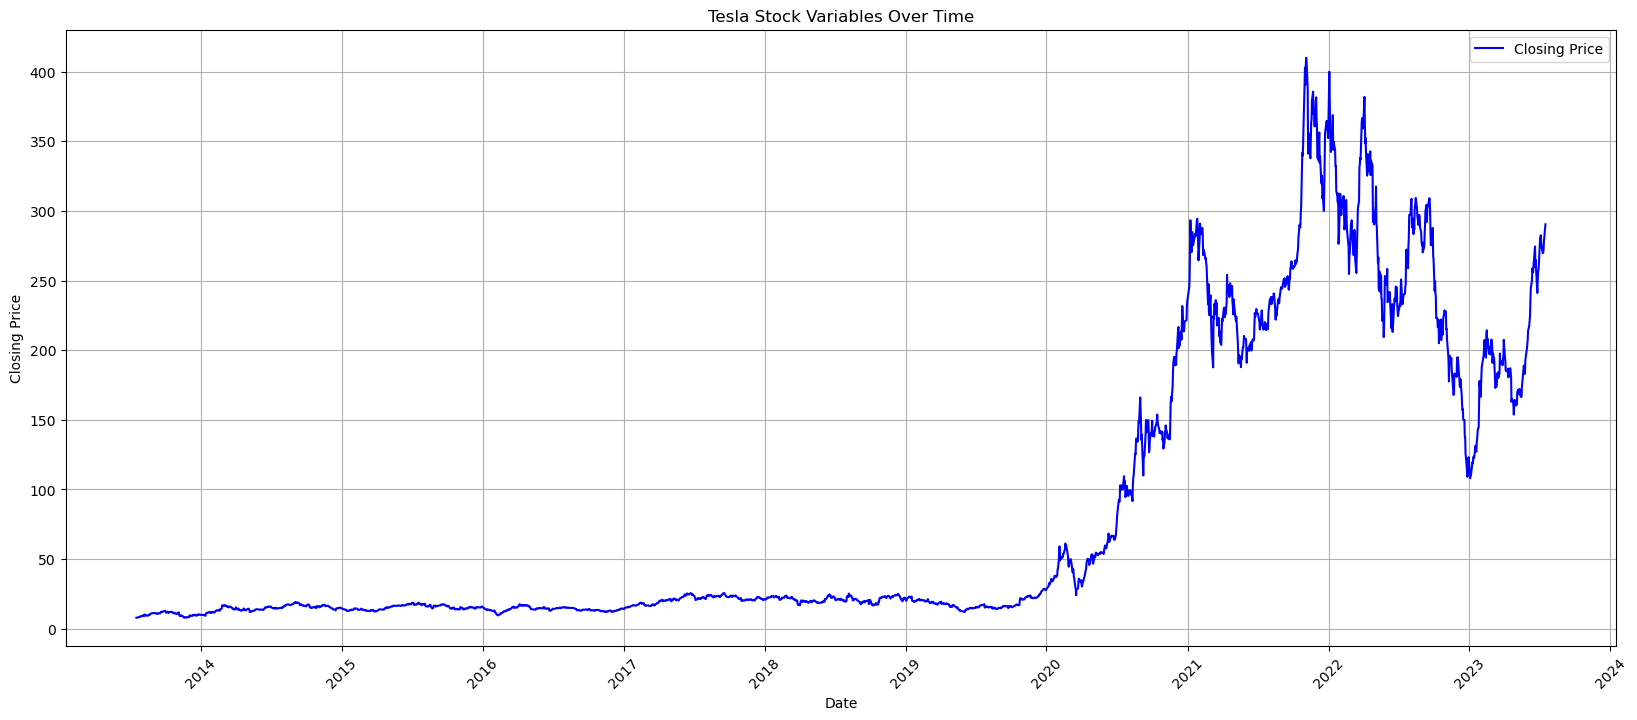

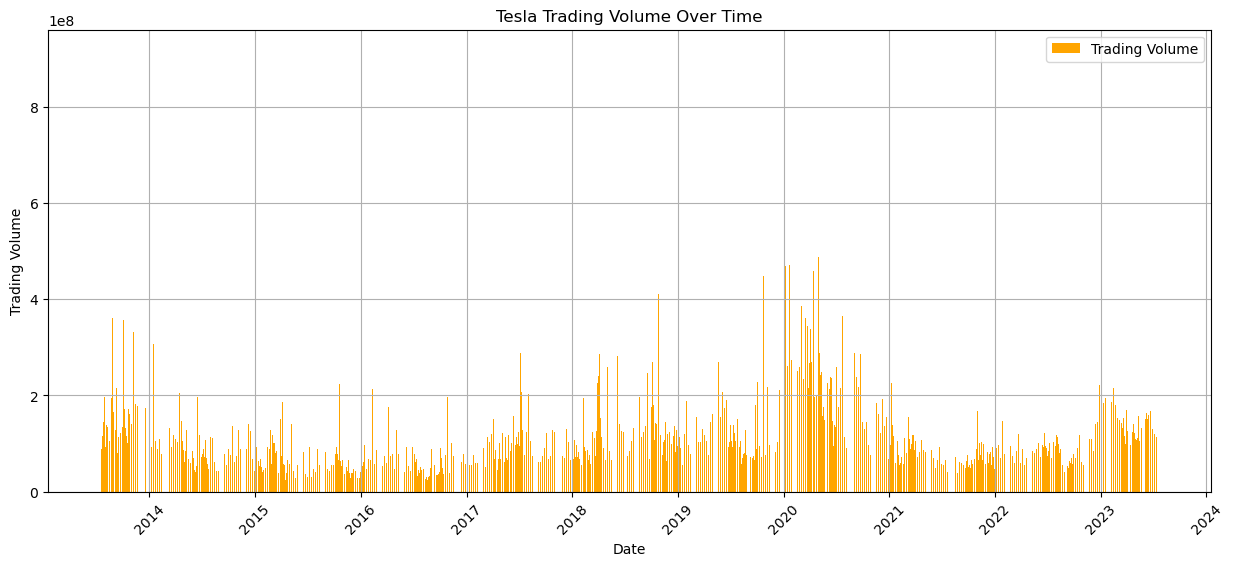

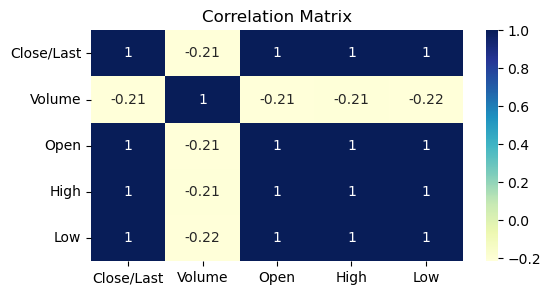

In [27]:
# finding the analysis in tesla company data
tesla_data = stock_market[stock_market['Company'] == 'TSLA']

# Line chart for stock variables over time
plt.figure(figsize=(20,8))
plt.plot(tesla_data['Date'], tesla_data['Close/Last'], color = 'Blue', label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Variables Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trdaing volumes over time
plt.figure(figsize=(15,6))
plt.bar(tesla_data['Date'], tesla_data['Volume'], color = 'orange', label = 'Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Tesla Trading Volume Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# Heatmap for correlation between two numeric data
correlation_matrix = stock_market.corr(numeric_only = True)
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Matrix')
plt.show()

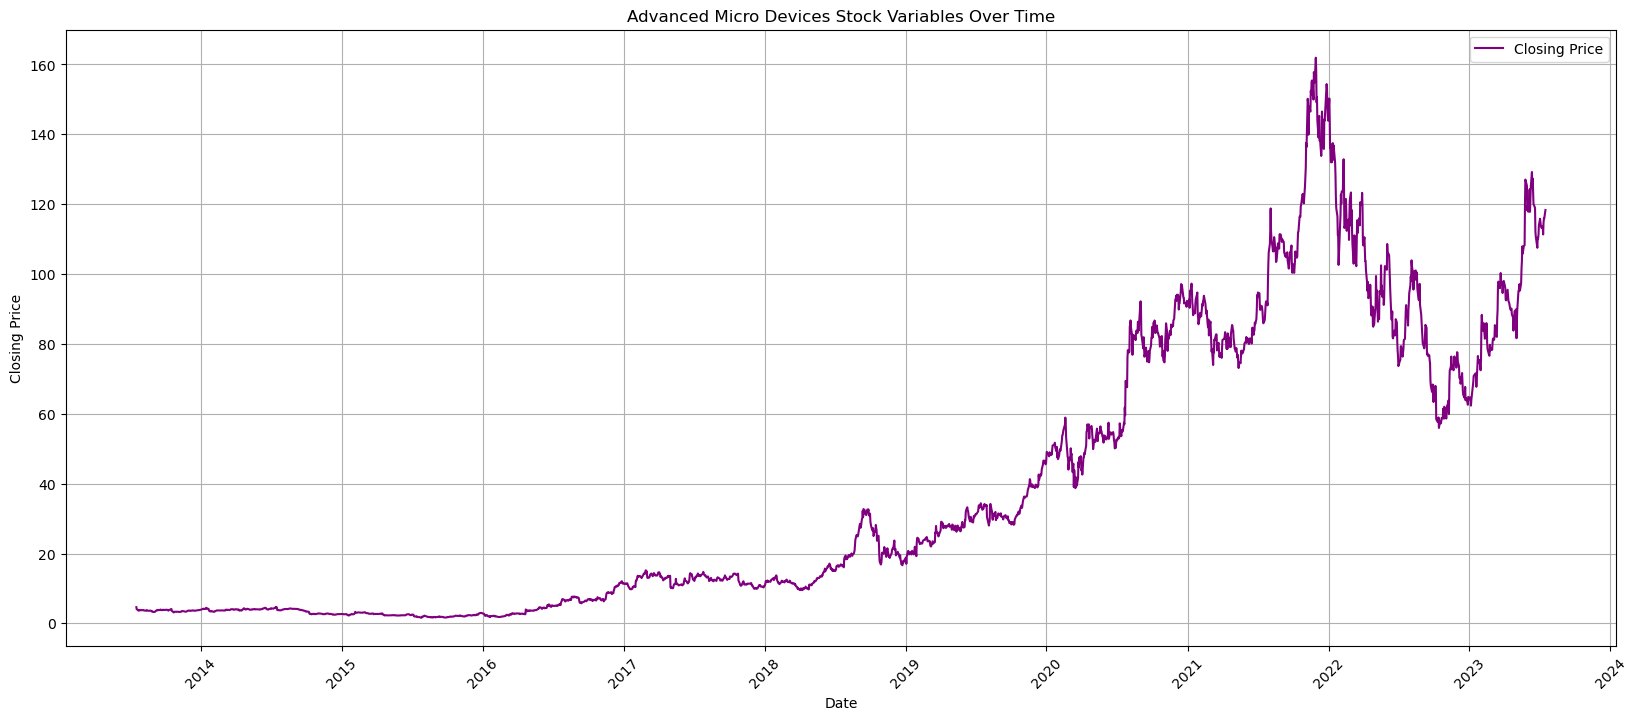

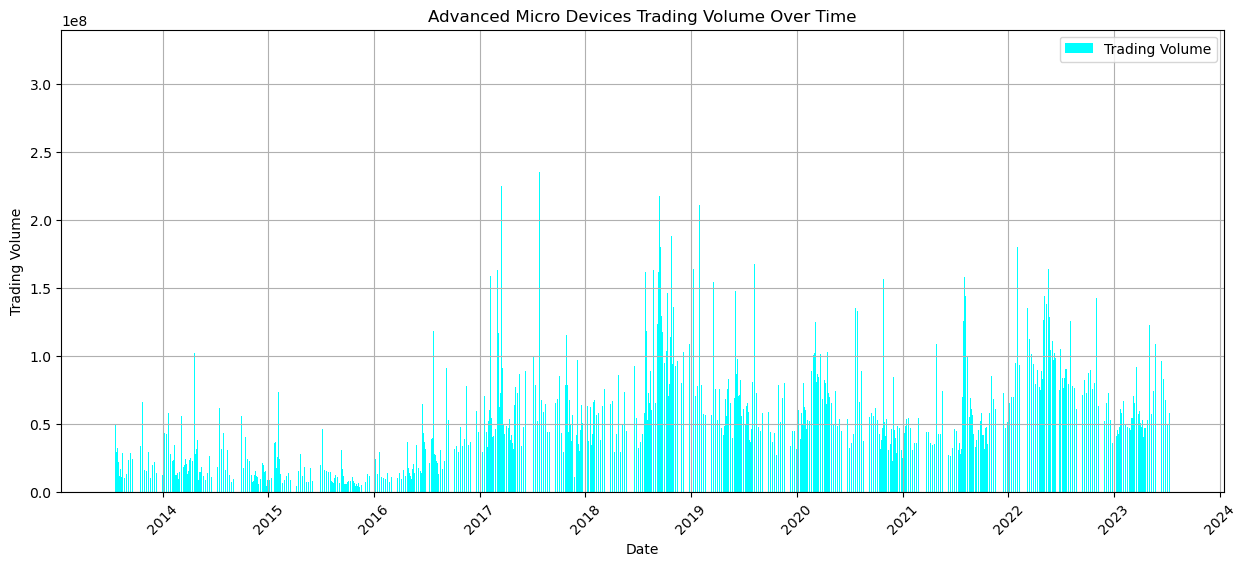

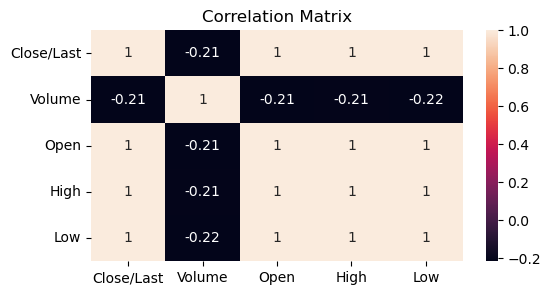

In [29]:
# finding the analysis in advanced micro devices company data
advanced_micro_devices_data = stock_market[stock_market['Company'] == 'AMD']

# Line chart for stock variables over time
plt.figure(figsize=(20,8))
plt.plot(advanced_micro_devices_data['Date'], advanced_micro_devices_data['Close/Last'], color = 'purple', label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Advanced Micro Devices Stock Variables Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trdaing volumes over time
plt.figure(figsize=(15,6))
plt.bar(advanced_micro_devices_data['Date'], advanced_micro_devices_data['Volume'], color = 'cyan', label = 'Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Advanced Micro Devices Trading Volume Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# Heatmap for correlation between two numeric data
correlation_matrix = stock_market.corr(numeric_only = True)
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.show()

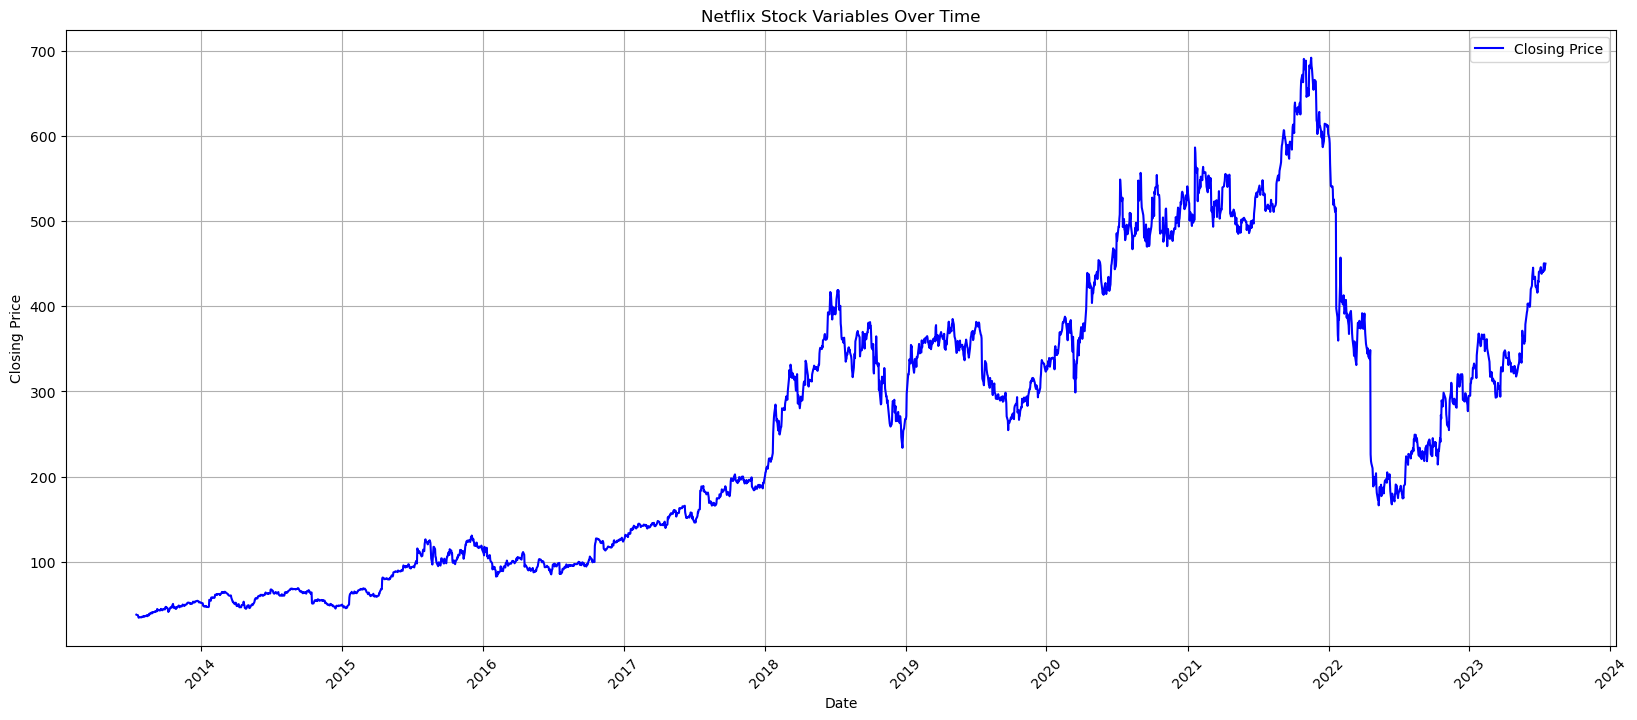

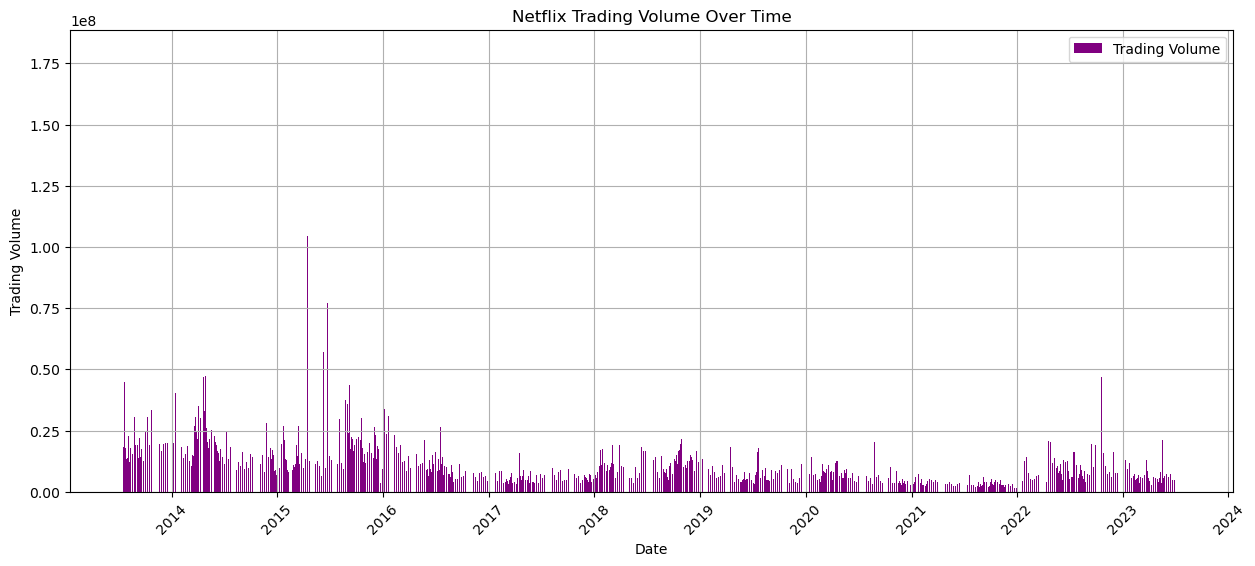

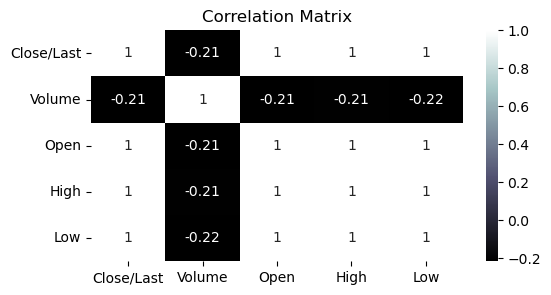

In [30]:
# finding the analysis in cisco company data
netflix_data = stock_market[stock_market['Company'] == 'NFLX']

# Line chart for stock variables over time
plt.figure(figsize=(20,8))
plt.plot(netflix_data['Date'], netflix_data['Close/Last'], color = 'Blue', label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Netflix Stock Variables Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trdaing volumes over time
plt.figure(figsize=(15,6))
plt.bar(netflix_data['Date'], netflix_data['Volume'], color = 'purple', label = 'Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Netflix Trading Volume Over Time')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

# Heatmap for correlation between two numeric data
correlation_matrix = stock_market.corr(numeric_only = True)
plt.figure(figsize=(6,3))
sns.heatmap(correlation_matrix, annot = True, cmap='bone')
plt.title('Correlation Matrix')
plt.show()

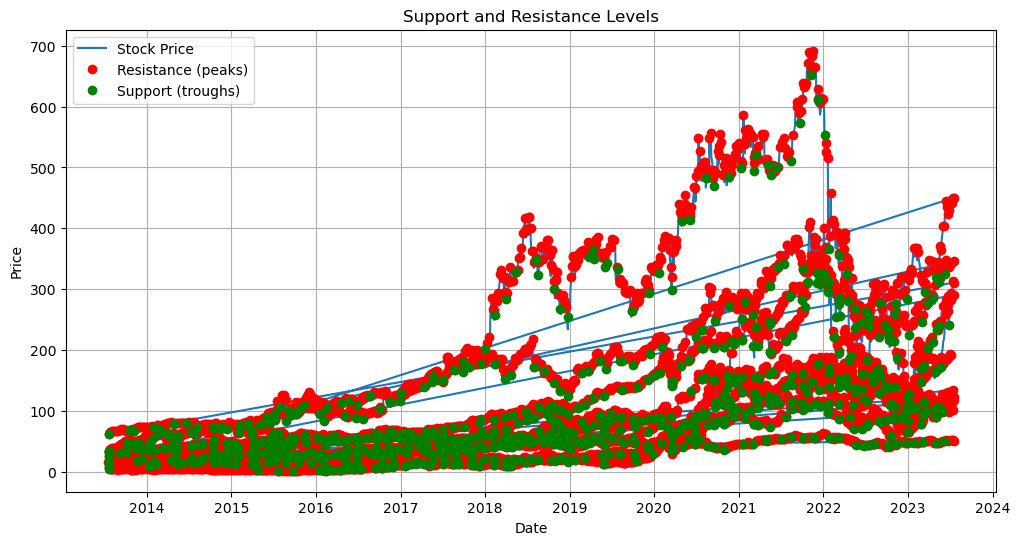

In [31]:
import pandas as pd
from scipy.signal import find_peaks, find_peaks_cwt
import matplotlib.pyplot as plt

# Assuming you've already loaded your data into the 'stock_market' DataFrame

# Identify peaks (potential resistance levels)
peaks, _ = find_peaks(stock_market['Close/Last'], height=0)

# Identify troughs (potential support levels)
troughs = find_peaks_cwt(-stock_market['Close/Last'], widths=range(1, 20))

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(stock_market['Date'], stock_market['Close/Last'], label='Stock Price')
plt.plot(stock_market['Date'][peaks], stock_market['Close/Last'][peaks], 'ro', label='Resistance (peaks)')
plt.plot(stock_market['Date'][troughs], stock_market['Close/Last'][troughs], 'go', label='Support (troughs)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support and Resistance Levels')
plt.legend()
plt.grid()
plt.show()

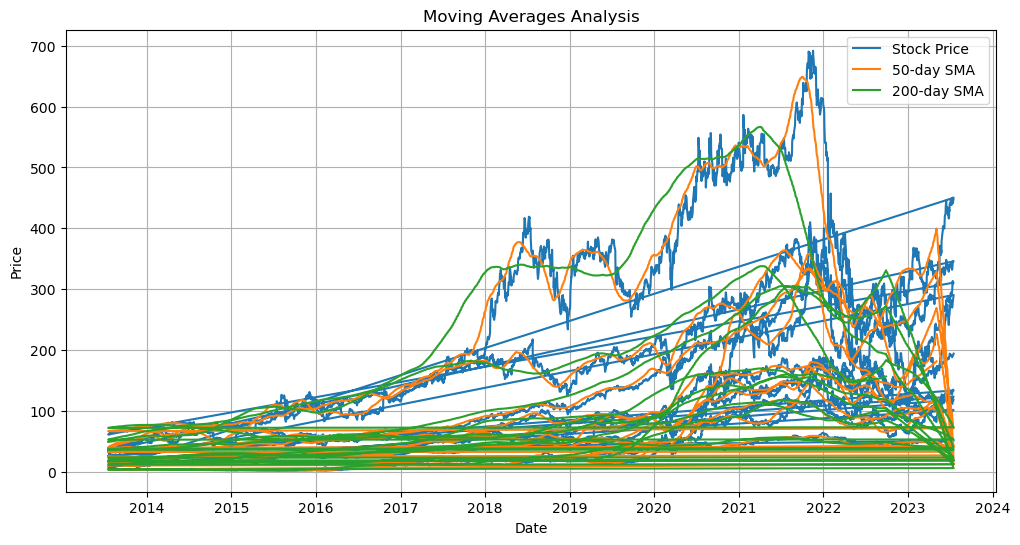

In [32]:
stock_market['50-day SMA'] = stock_market['Close/Last'].rolling(window=50).mean()

stock_market['200-day SMA'] = stock_market['Close/Last'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(stock_market['Date'], stock_market['Close/Last'], label='Stock Price')
plt.plot(stock_market['Date'], stock_market['50-day SMA'], label='50-day SMA')
plt.plot(stock_market['Date'], stock_market['200-day SMA'], label='200-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages Analysis')
plt.legend()
plt.grid()
plt.show()

# Calculate the 50-day EMA
stock_market['50-day EMA'] = stock_market['Close/Last'].ewm(span=50, adjust=False).mean()

# Calculate the 200-day EMA
stock_market['200-day EMA'] = stock_market['Close/Last'].ewm(span=200, adjust=False).mean()

In [33]:
stock_market

,Company,Date,Close/Last,Volume,Open,High,Low,50-day SMA,200-day SMA,50-day EMA,200-day EMA
0,AAPL,2023-07-17,193.9900,50520160,191.9000,194.3200,191.8100,NaN,NaN,193.990000,193.990000
1,AAPL,2023-07-14,190.6900,41616240,190.2300,191.1799,189.6300,NaN,NaN,193.860588,193.957164
2,AAPL,2023-07-13,190.5400,41342340,190.5000,191.1900,189.7800,NaN,NaN,193.730369,193.923163
3,AAPL,2023-07-12,189.7700,60750250,189.6800,191.7000,188.4700,NaN,NaN,193.575060,193.881838
4,AAPL,2023-07-11,188.0800,46638120,189.1600,189.3000,186.6000,NaN,NaN,193.359568,193.824108
...,...,...,...,...,...,...,...,...,...,...,...
25155,NFLX,2013-07-24,34.4714,33395351,35.6743,36.0357,34.3143,40.014294,49.232521,39.396274,48.271622
25156,NFLX,2013-07-23,35.7514,76792963,35.9143,37.4621,35.1714,39.784380,49.181521,39.253338,48.147043
25157,NFLX,2013-07-22,37.4228,44791095,38.1214,38.3928,36.7314,39.605350,49.139678,39.181552,48.040334
25158,NFLX,2013-07-19,37.7966,18098750,38.2043,38.2784,37.5971,39.477826,49.095668,39.127241,47.938406


C:\Users\QubitLTD-01\AppData\Local\Temp\ipykernel_10184\3748632727.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = stock_market.corr()


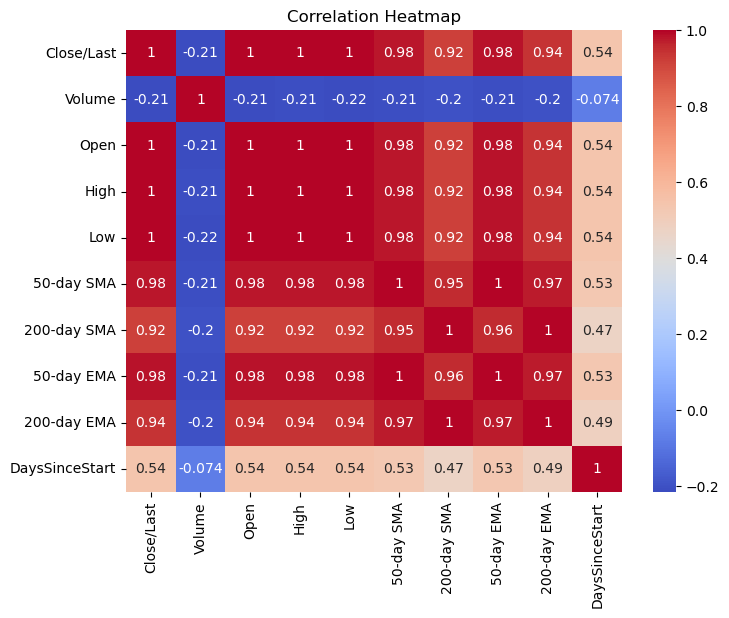

In [39]:
#Calculate the correlation matrix
correlation_matrix = stock_market.corr()

# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [2]:
# Time series plot of stock prices for a specific company
company_name = 'AMZN'
company_data = stock_market[stock_market['Company'] == 'AMZN']
plt.figure(figsize=(12, 6))
plt.plot(stock_market['Date'], stock_market['Close/Last'], label=company_name)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

# Box plot of stock prices for multiple companies
plt.figure(figsize=(10, 6))
sns.boxplot(x='Date', y='Close/Last', data=stock_market)
plt.xticks(rotation=90)
plt.xlabel('Company Name')
plt.ylabel('Closing Price')
plt.title('Box Plot of Closing Prices by Company')
plt.show()

NameError: name 'stock_market' is not defined

In [41]:
# Predictive analysis

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Convert the 'Date' column to a datetime data type
stock_market['Date'] = pd.to_datetime(stock_market['Date'])

# Calculate the number of days since the start of data
stock_market['DaysSinceStart'] = (stock_market['Date'] - stock_market['Date'].min()).dt.days

# Select features and target variable
X = stock_market[['DaysSinceStart', 'High', 'Low', 'Volume']]
y = stock_market['Close/Last']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 2.5482907052629606
R-squared (R2) Score: 0.9997465953125361


In [42]:
# Risk management

company_name = 'AMZN'
company_data = stock_market[stock_market['Company'] == 'AMZN']

# Set your initial investment and stop-loss percentage
initial_investment = 10000  # Specify your initial investment amount
stop_loss_percentage = 10  # Specify your stop-loss percentage (e.g., 10%)

# Calculate the stop-loss price
current_price = stock_market['Close/Last'].iloc[-1]
stop_loss_price = current_price - (current_price * stop_loss_percentage / 100)

# Define a function to check and execute the stop-loss order
def check_stop_loss():
    current_price = company_data['Close/Last'].iloc[-1]
    if current_price <= stop_loss_price:
        # Execute the stop-loss order
        shares_to_sell = initial_investment / current_price
        remaining_balance = 0
        print(f'Stop-loss triggered for {company_name} at ${current_price}. Selling {shares_to_sell:.2f} shares.')
    else:
        print(f'No stop-loss triggered for {company_name}. Current price: ${current_price:.2f}')

# Call the check_stop_loss function to evaluate the current price
check_stop_loss()

Stop-loss triggered for AMZN at $15.2055. Selling 657.66 shares.


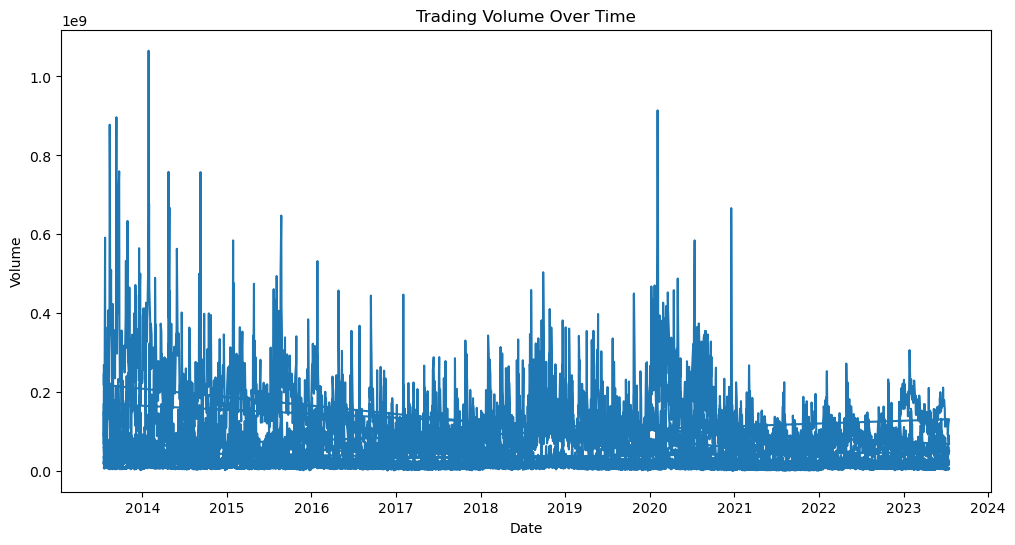

In [43]:

# Plot trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(stock_market['Date'], stock_market['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [44]:
stock_market

,Company,Date,Close/Last,Volume,Open,High,Low,50-day SMA,200-day SMA,50-day EMA,200-day EMA,DaysSinceStart
0,AAPL,2023-07-17,193.9900,50520160,191.9000,194.3200,191.8100,NaN,NaN,193.990000,193.990000,3651
1,AAPL,2023-07-14,190.6900,41616240,190.2300,191.1799,189.6300,NaN,NaN,193.860588,193.957164,3648
2,AAPL,2023-07-13,190.5400,41342340,190.5000,191.1900,189.7800,NaN,NaN,193.730369,193.923163,3647
3,AAPL,2023-07-12,189.7700,60750250,189.6800,191.7000,188.4700,NaN,NaN,193.575060,193.881838,3646
4,AAPL,2023-07-11,188.0800,46638120,189.1600,189.3000,186.6000,NaN,NaN,193.359568,193.824108,3645
...,...,...,...,...,...,...,...,...,...,...,...,...
25155,NFLX,2013-07-24,34.4714,33395351,35.6743,36.0357,34.3143,40.014294,49.232521,39.396274,48.271622,6
25156,NFLX,2013-07-23,35.7514,76792963,35.9143,37.4621,35.1714,39.784380,49.181521,39.253338,48.147043,5
25157,NFLX,2013-07-22,37.4228,44791095,38.1214,38.3928,36.7314,39.605350,49.139678,39.181552,48.040334,4
25158,NFLX,2013-07-19,37.7966,18098750,38.2043,38.2784,37.5971,39.477826,49.095668,39.127241,47.938406,1


In [ ]:
stock_market['Date'] = pd.to_datetime(stock_market['Date'])

plt.figure(figsize=(12, 6))
stock_market.plot(kind='bar', color='b', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.title('Seasonal Patterns in Stock Performance')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(stock_market.index, stock_market, color='b', alpha=0.7)
plt.xlabel('Month (Numerical)')
plt.ylabel('Average Stock Price')
plt.title('Seasonal Patterns in Stock Performance')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# You can add custom labels for the numerical months if needed
plt.xticks(seasonal_averages.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

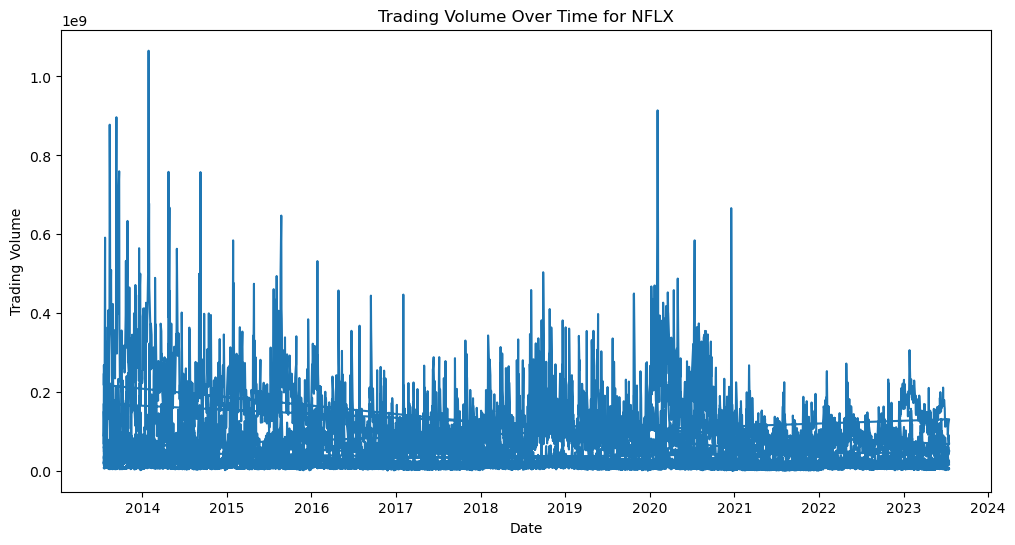

In [38]:
# Plot trading volume over time for a specific company
plt.figure(figsize=(12, 6))
plt.plot(stock_market['Date'], stock_market['Volume'])
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Trading Volume Over Time for ' + 'NFLX')
plt.show()